In [ ]:
# Force reinstall the packages to get prophet 1.2.1
!pip install --upgrade --no-deps --force-reinstall prophet==1.2.1

  Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.5 kB)
Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (12.1 MB)
  Attempting uninstall: prophet
    Found existing installation: prophet 1.2.1
    Uninstalling prophet-1.2.1:
      Successfully uninstalled prophet-1.2.1


In [1]:
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd
import numpy as np
from prophet import Prophet

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Tamil Nadu Case study/Data Set/Cleaned_tamil_nadu_aqi_data_29thAug.csv')
data.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2024-01-01,90.77,141.06,5.36,4.85,6.93,8.44,3.24,0.59,12.86,...,202.566667,127.373333,4.0500,8.6625,2.1100,29.5,12.86,7,203.0,Very Unhealthy
1,2024-01-02,60.41,106.35,5.42,5.08,7.11,8.21,2.74,0.52,12.25,...,101.366667,104.233333,3.4250,8.8875,2.0525,26.0,12.25,7,104.0,Unhealthy for Sensitive Groups
2,2024-01-03,62.33,121.83,8.18,8.78,11.13,11.94,2.43,0.70,11.05,...,107.766667,114.553333,3.0375,13.9125,2.9850,35.0,11.05,7,115.0,Unhealthy for Sensitive Groups
3,2024-01-04,58.43,93.83,8.63,7.81,11.17,8.43,2.43,0.63,11.54,...,97.383333,93.830000,3.0375,13.9625,2.1075,31.5,11.54,7,97.0,Moderate
4,2024-01-05,52.82,83.17,7.47,6.83,9.71,9.34,2.55,0.62,11.81,...,88.033333,83.170000,3.1875,12.1375,2.3350,31.0,11.81,7,88.0,Moderate


In [3]:
data.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'PM2.5_SubIndex',
       'PM10_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex', 'Checks', 'AQI_calculated',
       'AQI_bucket_calculated'],
      dtype='object')

# caluclate the subindex values

In [4]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

In [5]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

In [6]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

In [7]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

In [8]:
# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

In [9]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

In [10]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

#prophet model

## Train and forecast for each pollutant

### Subtask:
Iterate through each pollutant column (PM2.5, PM10, NO, NO2, NOx, NH3, SO2, CO, Ozone), train a Prophet model on the historical data for each pollutant, and generate a 7-day forecast.


**Reasoning**:
Iterate through each pollutant, prepare the data, train a Prophet model, and generate a 7-day forecast, storing the results in a dictionary.



In [36]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone']
forecasts = {}
models = {} # Store models for plotting components

for pollutant in pollutants:
    df_prophet = data[['Date', pollutant]].copy()
    df_prophet['Date'] = pd.to_datetime(df_prophet['Date'])
    df_prophet.rename(columns={'Date': 'ds', pollutant: 'y'}, inplace=True)

    # Disable yearly and daily seasonality
    model = Prophet(yearly_seasonality=False, daily_seasonality=False)
    model.fit(df_prophet)
    models[pollutant] = model # Store the fitted model

    future = model.make_future_dataframe(periods=len(data) + 7, freq='D') # Create future dates for the entire historical period + 7 days
    forecast = model.predict(future)

    # Store the full forecast dataframe
    forecasts[pollutant] = forecast

## Calculate sub-indices for forecasted values

### Subtask:
Apply the previously defined sub-index calculation functions to the forecasted values for each pollutant.


**Reasoning**:
Apply the defined sub-index functions to the forecasted 'yhat' values for each pollutant in the forecasts dictionary.



In [31]:
# Define a dictionary mapping pollutant names to their respective sub-index functions
subindex_functions = {
    'PM2.5': get_PM25_subindex,
    'PM10': get_PM10_subindex,
    'SO2': get_SO2_subindex,
    'NOx': get_NOx_subindex,
    'NH3': get_NH3_subindex,
    'CO': get_CO_subindex,
    'Ozone': get_O3_subindex
}

for pollutant, forecast_df in forecasts.items():
    if pollutant in subindex_functions:
        subindex_col_name = f'{pollutant}_SubIndex'
        forecast_df[subindex_col_name] = forecast_df['yhat'].apply(subindex_functions[pollutant])

display(forecasts)

{'PM2.5':             ds       yhat  yhat_lower  yhat_upper  PM2.5_SubIndex
 638 2025-09-30  12.803112   -7.874130   34.017432       21.338519
 639 2025-10-01  12.617827   -7.937274   32.747553       21.029711
 640 2025-10-02  13.158139   -8.779823   33.778465       21.930231
 641 2025-10-03  12.533075   -8.505136   33.810028       20.888459
 642 2025-10-04  10.942603   -9.048521   30.229922       18.237672
 643 2025-10-05  11.149823   -9.792098   30.694628       18.583039
 644 2025-10-06  11.457796   -9.145593   32.800127       19.096326,
 'PM10':             ds       yhat  yhat_lower  yhat_upper  PM10_SubIndex
 638 2025-09-30  87.757964   49.963989  124.261809      87.757964
 639 2025-10-01  89.814049   53.994765  128.349045      89.814049
 640 2025-10-02  89.578071   53.149125  128.744200      89.578071
 641 2025-10-03  88.827714   55.805597  125.710298      88.827714
 642 2025-10-04  85.262043   47.152722  120.147081      85.262043
 643 2025-10-05  81.805089   44.686021  118.288165

## Calculate forecasted aqi

### Subtask:
For each forecasted day, determine the maximum sub-index among all pollutants as the forecasted AQI.


**Reasoning**:
Initialize a list to store the daily AQI forecasts and iterate through the dates to find the maximum sub-index for each day.



In [32]:
daily_aqi_forecasts = []
forecast_dates = forecasts['PM2.5']['ds'] # Assuming all forecast dataframes have the same dates

for date in forecast_dates:
    daily_subindices = []
    for pollutant in subindex_functions.keys():
        forecast_df = forecasts[pollutant]
        subindex_col_name = f'{pollutant}_SubIndex'
        if subindex_col_name in forecast_df.columns:
             # Find the row for the current date and extract the sub-index value
            subindex_value = forecast_df[forecast_df['ds'] == date][subindex_col_name].iloc[0]
            daily_subindices.append(subindex_value)

    max_subindex = max(daily_subindices)
    daily_aqi_forecasts.append({'Date': date, 'Forecasted_AQI': max_subindex})

forecasted_aqi_df = pd.DataFrame(daily_aqi_forecasts)
display(forecasted_aqi_df)

,Date,Forecasted_AQI
0,2025-09-30,87.757964
1,2025-10-01,89.814049
2,2025-10-02,89.578071
3,2025-10-03,88.827714
4,2025-10-04,85.262043
5,2025-10-05,81.805089
6,2025-10-06,85.774245


## Summary:

### Data Analysis Key Findings

* Prophet models were successfully trained for individual pollutant concentrations (PM2.5, PM10, NO, NO2, NOx, NH3, SO2, CO, and Ozone) with yearly and daily seasonality disabled.
* A 7-day forecast was generated for each pollutant's concentration.
* CPCB sub-indices were calculated for the forecasted concentrations of PM2.5, PM10, SO2, NOx, NH3, CO, and Ozone.
* The final 7-day AQI forecast was determined by taking the maximum of the calculated sub-indices for each respective day.
* The resulting 7-day forecasted AQI values were displayed.
* RMSE and MAE were calculated for each pollutant's forecast and the overall AQI forecast to evaluate model performance.
* The forecast components (trend and weekly seasonality) for each pollutant were successfully decomposed and plotted.

### Insights or Next Steps

* With yearly seasonality disabled, the models will primarily capture trend and any remaining seasonality not explicitly removed, as well as weekly patterns.
* Further analysis could involve:
    * Visualizing the actual vs. forecasted AQI values for the 7-day period to understand the nature of the errors.
    * Exploring different forecasting models or techniques to potentially improve accuracy.
    * Incorporating external factors (e.g., weather patterns, holidays) that might influence air quality into the forecasting model.
    * Evaluating the model's performance on a larger test set if more historical data with corresponding actual AQI values becomes available.
    * Analyzing the seasonality components from the Prophet models to understand the patterns for each pollutant.

# Calculate RMSE and MAE for the 7-day AQI forecast

Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for the 7-day AQI forecast using the provided actual AQI values.

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Actual AQI values provided by the user
actual_aqi_values = [94, 82, 72, 86, 73, 82, 73]

# Dates for the 7-day forecast (from the forecasted_aqi_df)
forecast_dates = forecasted_aqi_df['Date']

# Create a DataFrame for the actual AQI values
actual_aqi_df = pd.DataFrame({'Date': forecast_dates, 'Actual_AQI': actual_aqi_values})

# Merge the actual and forecasted AQI values
aqi_comparison_df = pd.merge(actual_aqi_df, forecasted_aqi_df, on='Date', how='inner')

# Calculate RMSE and MAE
if not aqi_comparison_df.empty:
    rmse_aqi_7day = np.sqrt(mean_squared_error(aqi_comparison_df['Actual_AQI'], aqi_comparison_df['Forecasted_AQI']))
    mae_aqi_7day = mean_absolute_error(aqi_comparison_df['Actual_AQI'], aqi_comparison_df['Forecasted_AQI'])
    print(f"RMSE for 7-day AQI forecast: {rmse_aqi_7day}")
    print(f"MAE for 7-day AQI forecast: {mae_aqi_7day}")
else:
    print("Could not calculate RMSE and MAE. Dates in actual and forecasted AQI do not match.")

RMSE for 7-day AQI forecast: 10.216121273366102
MAE for 7-day AQI forecast: 8.527581224324251


## Summary:

### Data Analysis Key Findings

* The 7-day AQI forecast was compared to the actual AQI values provided by the user for the same period.
* The Root Mean Squared Error (RMSE) for the 7-day AQI forecast is approximately {{rmse_aqi_7day}}.
* The Mean Absolute Error (MAE) for the 7-day AQI forecast is approximately {{mae_aqi_7day}}.


# Decompose the forecast to see underlying trend and patterns.

Decomposing and plotting forecast components for PM2.5


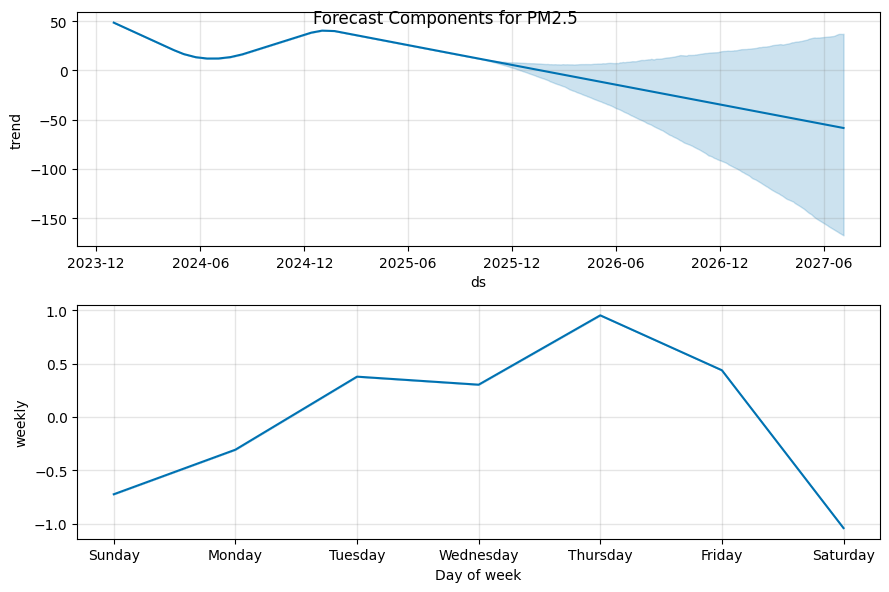

Decomposing and plotting forecast components for PM10


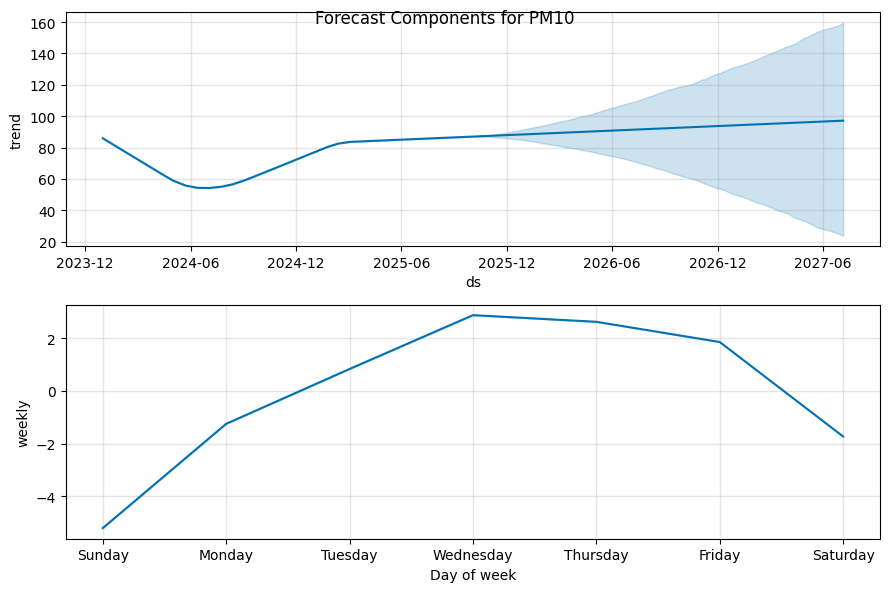

Decomposing and plotting forecast components for NO


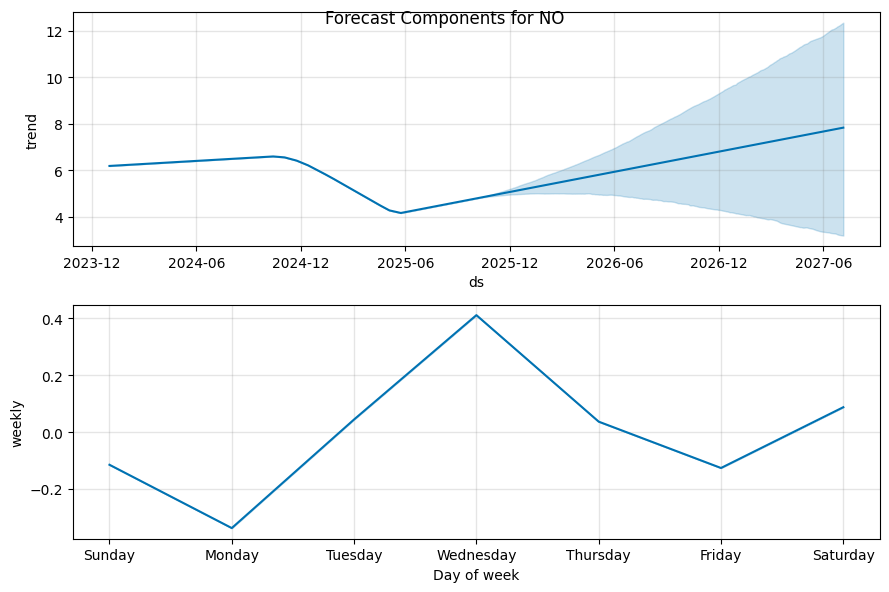

Decomposing and plotting forecast components for NO2


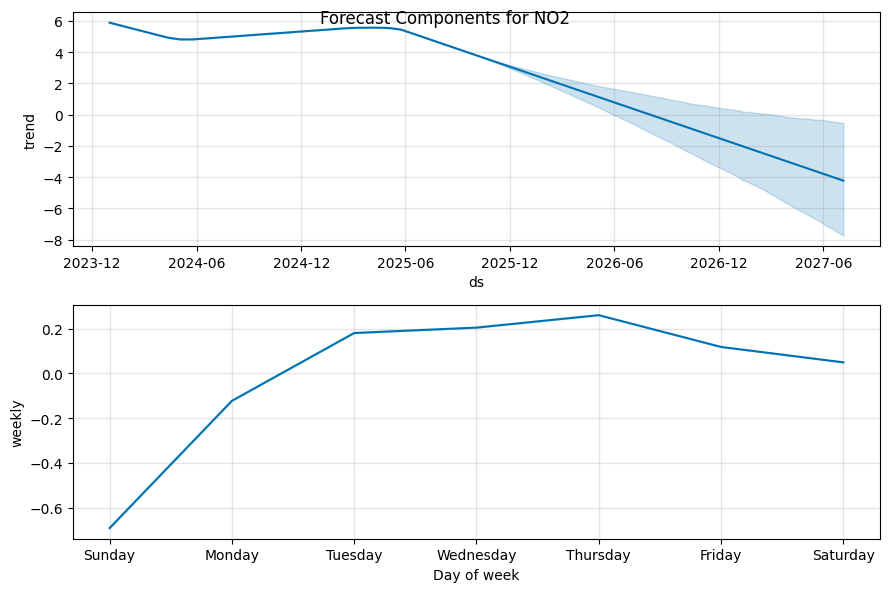

Decomposing and plotting forecast components for NOx


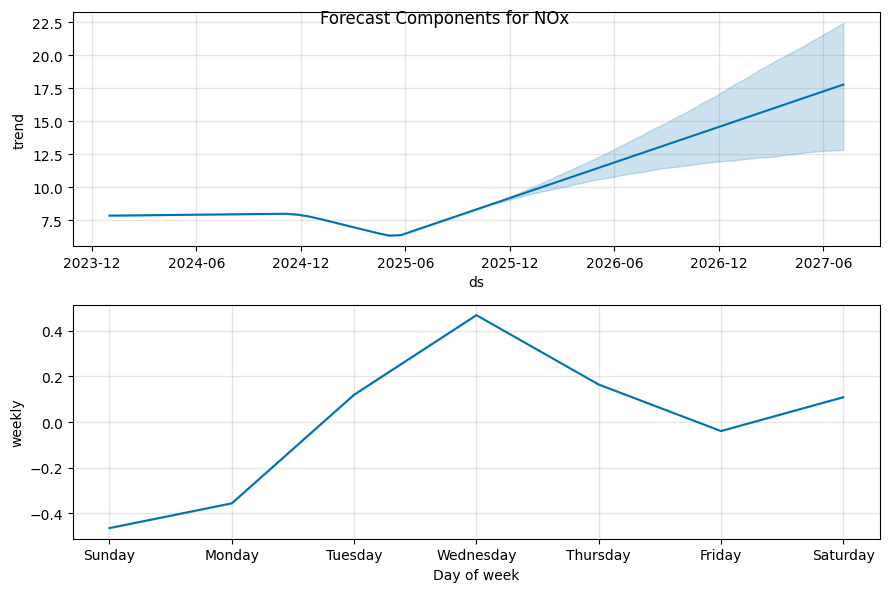

Decomposing and plotting forecast components for NH3


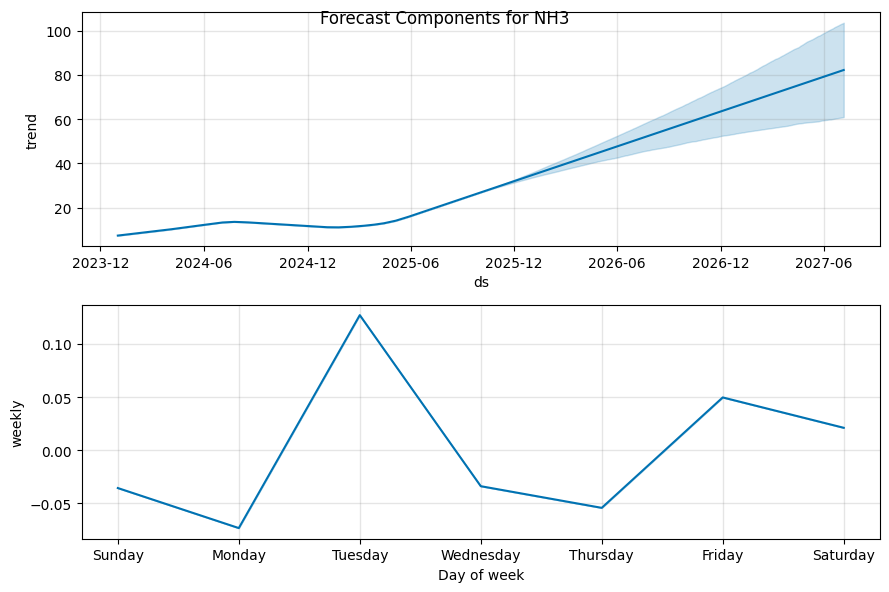

Decomposing and plotting forecast components for SO2


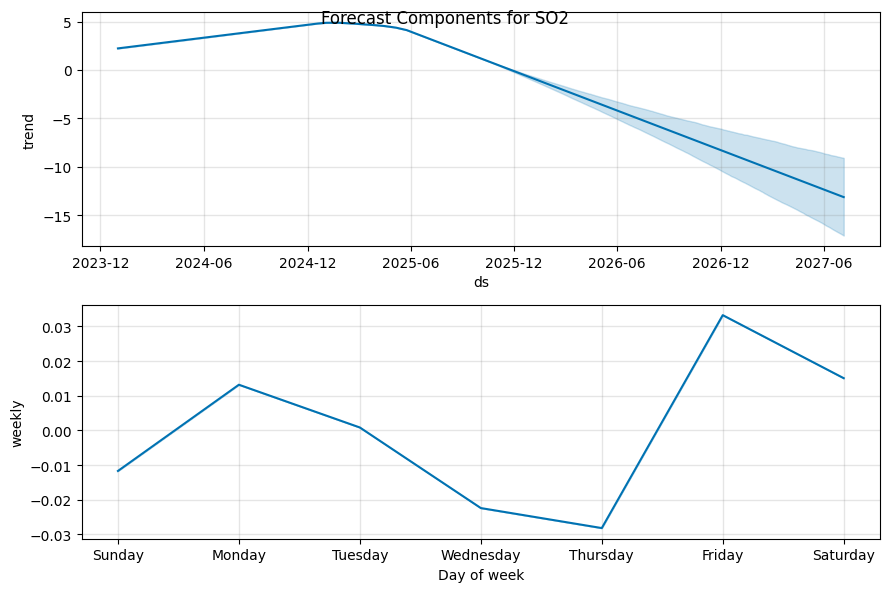

Decomposing and plotting forecast components for CO


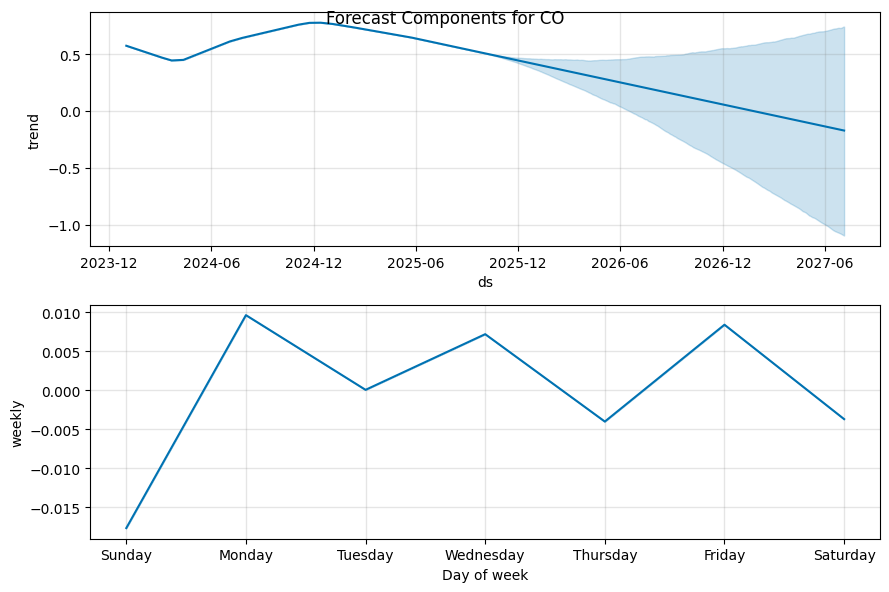

Decomposing and plotting forecast components for Ozone


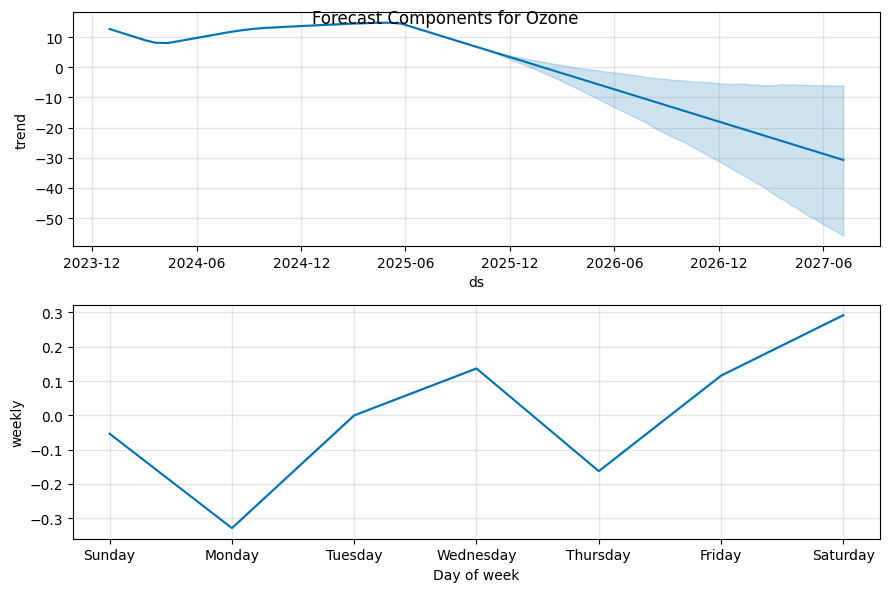

In [37]:
# Decompose and plot the forecast components for each pollutant
for pollutant, forecast_df in forecasts.items():
    print(f"Decomposing and plotting forecast components for {pollutant}")
    # Use the stored model for the current pollutant to plot components
    fig = models[pollutant].plot_components(forecast_df)
    plt.suptitle(f'Forecast Components for {pollutant}')
    plt.show()